<a href="https://colab.research.google.com/github/elisabethelen/UAS06DL-2025/blob/main/MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌿 Klasifikasi Daun Lokal 12 Kelas
Menggunakan CNN, MobileNetV2, dan ResNet50 + Evaluasi & Penyimpanan Otomatis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive'

'202255202004_Shilvia Irani Sukri_Penggunaan Hash Function untuk Penyimpanan Password.pdf'
 cobaDataset
'Colab Notebooks'
 Dataset_datming
 DatasetFloraGroup
 DLTugas5
 tugas5
 UasDatming.ipynb
 Untitled0.ipynb


In [ ]:
dataset_path = '/content/drive/MyDrive/DatasetFloraGroup'

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2, ResNet50
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import cv2

## 📂 Load Dataset

In [ ]:
# 1. Path ke dataset (ubah sesuai lokasi dataset di Google Drive kamu)
dataset_path = '/content/drive/MyDrive/DatasetFloraGroup'

# 2. Ukuran gambar & batch size
img_size = (224, 224)
batch_size = 32

# 3. ImageDataGenerator dengan split 50% untuk validasi
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.5
)

# 4. Generator untuk training (50%)
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# 5. Generator untuk validasi (50%)
val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# 6. Ambil jumlah kelas dari generator
num_classes = train_gen.num_classes

Found 249 images belonging to 8 classes.
Found 246 images belonging to 8 classes.


## 🧠 MobileNetv2 + Saving Otomatis

In [ ]:
# Load base model MobileNetV2
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet_base.trainable = False  # Freeze base model

# Build model
mobilenet_model = Sequential([
    mobilenet_base,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile model
mobilenet_model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Path to save the model
mobilenet_path = '/content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5'

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint(mobilenet_path, monitor='val_loss', save_best_only=True, verbose=1)

# Train model
mobilenet_history = mobilenet_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50,
    callbacks=[early_stop, checkpoint]
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.1488 - loss: 2.9863 
Epoch 1: val_loss improved from inf to 2.37504, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 271s 36s/step - accuracy: 0.1475 - loss: 2.9891 - val_accuracy: 0.1585 - val_loss: 2.3750
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1801 - loss: 2.8049
Epoch 2: val_loss improved from 2.37504 to 2.18179, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 76s 10s/step - accuracy: 0.1806 - loss: 2.7873 - val_accuracy: 0.1951 - val_loss: 2.1818
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2693 - loss: 2.3992
Epoch 3: val_loss improved from 2.18179 to 2.02869, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 10s/step - accuracy: 0.2630 - loss: 2.4114 - val_accuracy: 0.2358 - val_loss: 2.0287
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2286 - loss: 2.4045
Epoch 4: val_loss improved from 2.02869 to 1.90471, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 80s 10s/step - accuracy: 0.2295 - loss: 2.3972 - val_accuracy: 0.3049 - val_loss: 1.9047
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2264 - loss: 2.3907
Epoch 5: val_loss improved from 1.90471 to 1.80560, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 70s 9s/step - accuracy: 0.2262 - loss: 2.3861 - val_accuracy: 0.3415 - val_loss: 1.8056
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2788 - loss: 2.1364
Epoch 6: val_loss improved from 1.80560 to 1.72287, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 69s 9s/step - accuracy: 0.2786 - loss: 2.1367 - val_accuracy: 0.3902 - val_loss: 1.7229
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2702 - loss: 1.8026
Epoch 7: val_loss improved from 1.72287 to 1.65004, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 78s 10s/step - accuracy: 0.2714 - loss: 1.8151 - val_accuracy: 0.4390 - val_loss: 1.6500
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3192 - loss: 2.0142
Epoch 8: val_loss improved from 1.65004 to 1.58369, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 72s 9s/step - accuracy: 0.3221 - loss: 2.0031 - val_accuracy: 0.4512 - val_loss: 1.5837
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3673 - loss: 1.8491
Epoch 9: val_loss improved from 1.58369 to 1.52258, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 72s 10s/step - accuracy: 0.3653 - loss: 1.8549 - val_accuracy: 0.4715 - val_loss: 1.5226
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4129 - loss: 1.6425
Epoch 10: val_loss improved from 1.52258 to 1.46745, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 10s/step - accuracy: 0.4117 - loss: 1.6445 - val_accuracy: 0.4756 - val_loss: 1.4674
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3969 - loss: 1.6773
Epoch 11: val_loss improved from 1.46745 to 1.41936, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 73s 9s/step - accuracy: 0.4010 - loss: 1.6642 - val_accuracy: 0.4797 - val_loss: 1.4194
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3968 - loss: 1.5546
Epoch 12: val_loss improved from 1.41936 to 1.37562, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 72s 9s/step - accuracy: 0.3996 - loss: 1.5532 - val_accuracy: 0.4837 - val_loss: 1.3756
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4953 - loss: 1.4025
Epoch 13: val_loss improved from 1.37562 to 1.33594, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 70s 9s/step - accuracy: 0.4965 - loss: 1.4017 - val_accuracy: 0.4878 - val_loss: 1.3359
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4649 - loss: 1.4037
Epoch 14: val_loss improved from 1.33594 to 1.29985, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 73s 10s/step - accuracy: 0.4668 - loss: 1.4005 - val_accuracy: 0.4837 - val_loss: 1.2998
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5007 - loss: 1.3052
Epoch 15: val_loss improved from 1.29985 to 1.26554, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 81s 11s/step - accuracy: 0.5009 - loss: 1.3077 - val_accuracy: 0.5285 - val_loss: 1.2655
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5819 - loss: 1.1887
Epoch 16: val_loss improved from 1.26554 to 1.23470, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 74s 10s/step - accuracy: 0.5815 - loss: 1.1890 - val_accuracy: 0.5366 - val_loss: 1.2347
Epoch 17/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5692 - loss: 1.2104
Epoch 17: val_loss improved from 1.23470 to 1.20433, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 71s 9s/step - accuracy: 0.5671 - loss: 1.2118 - val_accuracy: 0.5569 - val_loss: 1.2043
Epoch 18/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5794 - loss: 1.1890
Epoch 18: val_loss improved from 1.20433 to 1.17965, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 70s 9s/step - accuracy: 0.5810 - loss: 1.1853 - val_accuracy: 0.5732 - val_loss: 1.1797
Epoch 19/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5635 - loss: 1.2354
Epoch 19: val_loss improved from 1.17965 to 1.15601, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 72s 10s/step - accuracy: 0.5647 - loss: 1.2287 - val_accuracy: 0.5894 - val_loss: 1.1560
Epoch 20/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6416 - loss: 1.0528
Epoch 20: val_loss improved from 1.15601 to 1.13506, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 10s/step - accuracy: 0.6421 - loss: 1.0512 - val_accuracy: 0.5976 - val_loss: 1.1351
Epoch 21/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6720 - loss: 1.0239
Epoch 21: val_loss improved from 1.13506 to 1.11353, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 69s 9s/step - accuracy: 0.6674 - loss: 1.0273 - val_accuracy: 0.6057 - val_loss: 1.1135
Epoch 22/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6486 - loss: 0.9160
Epoch 22: val_loss improved from 1.11353 to 1.09446, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 10s/step - accuracy: 0.6489 - loss: 0.9210 - val_accuracy: 0.6138 - val_loss: 1.0945
Epoch 23/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6669 - loss: 0.9131
Epoch 23: val_loss improved from 1.09446 to 1.07798, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 10s/step - accuracy: 0.6691 - loss: 0.9145 - val_accuracy: 0.6220 - val_loss: 1.0780
Epoch 24/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6496 - loss: 0.9301
Epoch 24: val_loss improved from 1.07798 to 1.06328, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 75s 9s/step - accuracy: 0.6528 - loss: 0.9249 - val_accuracy: 0.6260 - val_loss: 1.0633
Epoch 25/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7393 - loss: 0.7467
Epoch 25: val_loss improved from 1.06328 to 1.04702, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 70s 9s/step - accuracy: 0.7353 - loss: 0.7493 - val_accuracy: 0.6423 - val_loss: 1.0470
Epoch 26/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7437 - loss: 0.8327
Epoch 26: val_loss improved from 1.04702 to 1.03198, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 71s 9s/step - accuracy: 0.7414 - loss: 0.8307 - val_accuracy: 0.6545 - val_loss: 1.0320
Epoch 27/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7708 - loss: 0.7533
Epoch 27: val_loss improved from 1.03198 to 1.01911, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 80s 9s/step - accuracy: 0.7690 - loss: 0.7556 - val_accuracy: 0.6667 - val_loss: 1.0191
Epoch 28/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7979 - loss: 0.7042
Epoch 28: val_loss improved from 1.01911 to 1.00667, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 76s 10s/step - accuracy: 0.7967 - loss: 0.7087 - val_accuracy: 0.6748 - val_loss: 1.0067
Epoch 29/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8036 - loss: 0.7145
Epoch 29: val_loss improved from 1.00667 to 0.99870, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 73s 9s/step - accuracy: 0.8040 - loss: 0.7123 - val_accuracy: 0.6829 - val_loss: 0.9987
Epoch 30/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8005 - loss: 0.6843
Epoch 30: val_loss improved from 0.99870 to 0.98666, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 82s 11s/step - accuracy: 0.8008 - loss: 0.6815 - val_accuracy: 0.6829 - val_loss: 0.9867
Epoch 31/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8618 - loss: 0.6217
Epoch 31: val_loss improved from 0.98666 to 0.97516, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 81s 11s/step - accuracy: 0.8593 - loss: 0.6249 - val_accuracy: 0.6829 - val_loss: 0.9752
Epoch 32/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8094 - loss: 0.6149
Epoch 32: val_loss improved from 0.97516 to 0.96360, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 71s 9s/step - accuracy: 0.8087 - loss: 0.6175 - val_accuracy: 0.6789 - val_loss: 0.9636
Epoch 33/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8413 - loss: 0.5397
Epoch 33: val_loss improved from 0.96360 to 0.95439, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 10s/step - accuracy: 0.8384 - loss: 0.5474 - val_accuracy: 0.6911 - val_loss: 0.9544
Epoch 34/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8453 - loss: 0.5604
Epoch 34: val_loss improved from 0.95439 to 0.94410, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 74s 10s/step - accuracy: 0.8419 - loss: 0.5635 - val_accuracy: 0.6911 - val_loss: 0.9441
Epoch 35/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8017 - loss: 0.5950
Epoch 35: val_loss improved from 0.94410 to 0.93725, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 10s/step - accuracy: 0.8006 - loss: 0.5969 - val_accuracy: 0.6911 - val_loss: 0.9372
Epoch 36/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8328 - loss: 0.5290
Epoch 36: val_loss improved from 0.93725 to 0.92975, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 67s 9s/step - accuracy: 0.8336 - loss: 0.5320 - val_accuracy: 0.6911 - val_loss: 0.9297
Epoch 37/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8406 - loss: 0.5598
Epoch 37: val_loss improved from 0.92975 to 0.92140, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 69s 9s/step - accuracy: 0.8391 - loss: 0.5625 - val_accuracy: 0.6911 - val_loss: 0.9214
Epoch 38/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8170 - loss: 0.5996
Epoch 38: val_loss improved from 0.92140 to 0.91590, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 68s 9s/step - accuracy: 0.8200 - loss: 0.5936 - val_accuracy: 0.6870 - val_loss: 0.9159
Epoch 39/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8901 - loss: 0.4686
Epoch 39: val_loss improved from 0.91590 to 0.91105, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 68s 9s/step - accuracy: 0.8898 - loss: 0.4673 - val_accuracy: 0.6911 - val_loss: 0.9111
Epoch 40/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8756 - loss: 0.4706
Epoch 40: val_loss improved from 0.91105 to 0.90543, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 81s 11s/step - accuracy: 0.8778 - loss: 0.4672 - val_accuracy: 0.6870 - val_loss: 0.9054
Epoch 41/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8442 - loss: 0.4918
Epoch 41: val_loss improved from 0.90543 to 0.90160, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 10s/step - accuracy: 0.8445 - loss: 0.4924 - val_accuracy: 0.6992 - val_loss: 0.9016
Epoch 42/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8976 - loss: 0.4282
Epoch 42: val_loss improved from 0.90160 to 0.89852, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - accuracy: 0.8974 - loss: 0.4309 - val_accuracy: 0.7033 - val_loss: 0.8985
Epoch 43/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8629 - loss: 0.4552
Epoch 43: val_loss improved from 0.89852 to 0.89819, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 68s 9s/step - accuracy: 0.8652 - loss: 0.4540 - val_accuracy: 0.7114 - val_loss: 0.8982
Epoch 44/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8872 - loss: 0.5096
Epoch 44: val_loss improved from 0.89819 to 0.89448, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 85s 9s/step - accuracy: 0.8890 - loss: 0.5055 - val_accuracy: 0.7114 - val_loss: 0.8945
Epoch 45/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9013 - loss: 0.3995
Epoch 45: val_loss improved from 0.89448 to 0.88795, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 71s 9s/step - accuracy: 0.9024 - loss: 0.3984 - val_accuracy: 0.7114 - val_loss: 0.8879
Epoch 46/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8783 - loss: 0.4672
Epoch 46: val_loss improved from 0.88795 to 0.88472, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 10s/step - accuracy: 0.8802 - loss: 0.4606 - val_accuracy: 0.7114 - val_loss: 0.8847
Epoch 47/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9147 - loss: 0.4013
Epoch 47: val_loss improved from 0.88472 to 0.87691, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 69s 9s/step - accuracy: 0.9139 - loss: 0.4011 - val_accuracy: 0.7195 - val_loss: 0.8769
Epoch 48/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9178 - loss: 0.3620
Epoch 48: val_loss improved from 0.87691 to 0.87126, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 80s 11s/step - accuracy: 0.9175 - loss: 0.3625 - val_accuracy: 0.7195 - val_loss: 0.8713
Epoch 49/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9509 - loss: 0.3580
Epoch 49: val_loss improved from 0.87126 to 0.86718, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 69s 9s/step - accuracy: 0.9506 - loss: 0.3561 - val_accuracy: 0.7195 - val_loss: 0.8672
Epoch 50/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8937 - loss: 0.3871
Epoch 50: val_loss improved from 0.86718 to 0.86528, saving model to /content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 69s 9s/step - accuracy: 0.8939 - loss: 0.3862 - val_accuracy: 0.7154 - val_loss: 0.8653
Restoring model weights from the end of the best epoch: 50.


**Penjelasan**

Model berhenti otomatis di epoch 17 karena tidak ada peningkatan lagi sejak epoch 12, dan hasil terbaik ada di epoch 12, jadi model dikembalikan ke kondisi terbaik itu


## 🧠 Evaluasi Model MobielNetV2


Validation Loss : 0.8653
Validation Accuracy : 0.7154
Classification Report:
               precision    recall  f1-score   support

Daun Singkong       1.00      1.00      1.00        27
   Daun Sirih       0.56      0.53      0.55        17
DaunBelimbing       1.00      1.00      1.00        29
   DaunCoklat       0.63      0.94      0.76        35
   DaunGersen       0.69      0.22      0.33        41
   DaunNangka       0.82      0.76      0.79        42
 DaunPeteCina       1.00      0.81      0.89        26
    DaunSalam       0.33      0.55      0.41        29

     accuracy                           0.72       246
    macro avg       0.75      0.73      0.72       246
 weighted avg       0.76      0.72      0.71       246



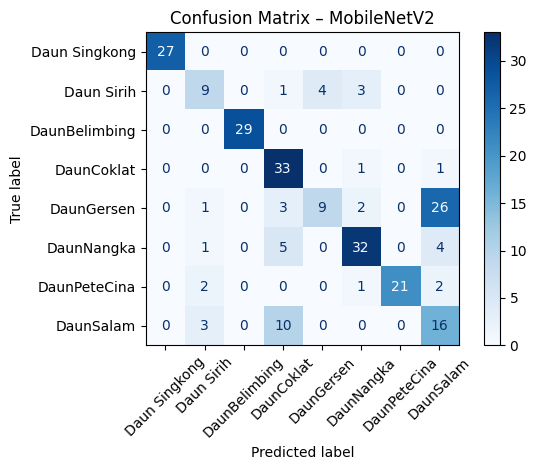

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pickle

# 1️⃣ Load model terbaik dari file .h5
mobilenet_path = '/content/drive/MyDrive/models/mobilenetv2_daun_12kelas.h5'
best_model = tf.keras.models.load_model(mobilenet_path)

# 2️⃣ Evaluasi langsung di validation/test set
loss, acc = best_model.evaluate(val_gen, verbose=0)
print(f"Validation Loss : {loss:.4f}")
print(f"Validation Accuracy : {acc:.4f}")

# 3️⃣ Prediksi label
y_true = val_gen.classes
y_pred_probs = best_model.predict(val_gen, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

# 4️⃣ Classification Report
class_names = list(val_gen.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# 5️⃣ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title("Confusion Matrix – MobileNetV2")
plt.tight_layout()
plt.show()